# Perceptron 
---

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep

plt.rcParams['figure.dpi'] = 150

In [45]:
def print_w_b(w, b):
    print(f'    w = {w}')
    print(f'    b = {b}')
    
def print_plot(X, y, w, b, w_, b_, conf=False):

    plt.grid(which='major', linewidth=0.25)

    # print (X, y)
    plt.scatter(X[:, 0][y == -1], X[:, 1][y == -1], c='r', s=4)
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c='b', s=4)

    # print separation boundary
    x1_line = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2_line = -(x1_line * w[0] + b) / w[1]
    xt_line = -(x1_line * w_[0] + b_) / w_[1]
    if conf:
        plt.plot(x1_line, x2_line, color='green', linewidth=1)
    else:
        plt.plot(x1_line, xt_line, color='green', linewidth=0.4, linestyle='--')
        plt.plot(x1_line, x2_line, color='black', linewidth=1)
        
    plt.xlim([X[:, 0].min()-0.5, X[:, 0].max()+0.5])
    plt.ylim([X[:, 1].min()-0.5, X[:, 1].max()+0.5])

    plt.show()

Binary classifier perceptron

In [46]:
class Perceptron:

    def __init__(self, learning_rate=0.1, n_iter=None):
        self.lr = learning_rate
        self.n_iter = n_iter
        self.w = None
        self.b = 0

    def out(self, X: np.ndarray):
        return np.dot(X, self.w) + self.b

    def predict(self, X: np.ndarray):
        pred = self.out(X)
        # classify prediction = {-1, +1}
        return np.where(pred >= 0, 1, -1)

    def fit(self, X: np.ndarray, y: np.ndarray, w_, b_):
        
        # Initialize w = 0 and b = 0
        self.w = np.random.random(X.shape[1])
        self.b = np.random.random()
    
        loss = []
        n_errors = -1
        
        # try to fit Perceptron in n_iter
        for epoch in range(self.n_iter):

            clear_output(wait=True)
            print(f'\nEpoch {epoch+1}:\n')
            print_w_b(self.w, self.b)
            if epoch > 0:
                print(f'\n    Loss (MSE) = {loss[-1]} (n_errors = {n_errors})\n')
            print_plot(X, y, self.w, self.b, w_, b_)

            if n_errors == 0 and epoch > 1:  # all points classified correctly
                print(f'All points classified correctly after {epoch+1} iterations')
                break

            n_errors = 0
            err = 0

            sleep(0.5)

            for xi, yi in zip(X, y):

                # yi_pred = sigma( x1*w1 + ... + xm*wm + b ) = {-1,+1}
                yi_pred = self.predict(xi)

                # if wrong prediction -> update weigths and bias
                if yi_pred != yi: 
                    n_errors += 1

                    # update w and b
                    '''
                    w(k+1) <- w(k) + lr * (y_true - out_pred) * x
                    b(k+1) <- b(k) + lr * (y_true - out_pred)
                    '''
                    self.w += self.lr * (yi - self.out(xi)) * xi
                    self.b += self.lr * (yi - self.out(xi))

                    err += (yi - self.out(xi))**2
            
            loss.append(err/X.shape[0])
        return loss


---

#### 2D Dataset creation

*Set use_Iris = True to use Iris dataset*

In [47]:
use_Iris = False

In [48]:
n_samples = 250
X = 20*np.random.rand(n_samples, 2) - 10

_Set w and b to learn_

In [49]:
w1_= 2*np.random.random()-1
w2_ = 2*np.random.random()-1
b_ = 2*np.random.random()-1
w1_, w2_, b_

(-0.6413147371910259, 0.3637836987771583, 0.9861560054018612)

In [50]:
w_ = np.array([w1_, w2_])

# Generete y
y = np.empty(X.shape[0])

for i, xi in enumerate(X):
    if np.dot(xi, w_) + b_ >= 0:
        y[i] = 1
    else:
        y[i] = -1

In [51]:
from sklearn.datasets import load_iris
import pandas as pd

if use_Iris:
    dataset = load_iris()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = pd.Series(dataset.target)
    # Iris flowers with target '2' removed from dataset
    df = df[df['target'] != 2]
    # Selected only first '2' features and target y
    y = pd.Series(df['target']).values
    y[y==0] = -1
    df = df.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
    X = df.values

### Percpetron Training

In [52]:
lr = 0.001
n_iter = 200


Epoch 18:

    w = [-0.14204607  0.07913673]
    b = 0.21456946776204155

    Loss (MSE) = 0.0 (n_errors = 0)



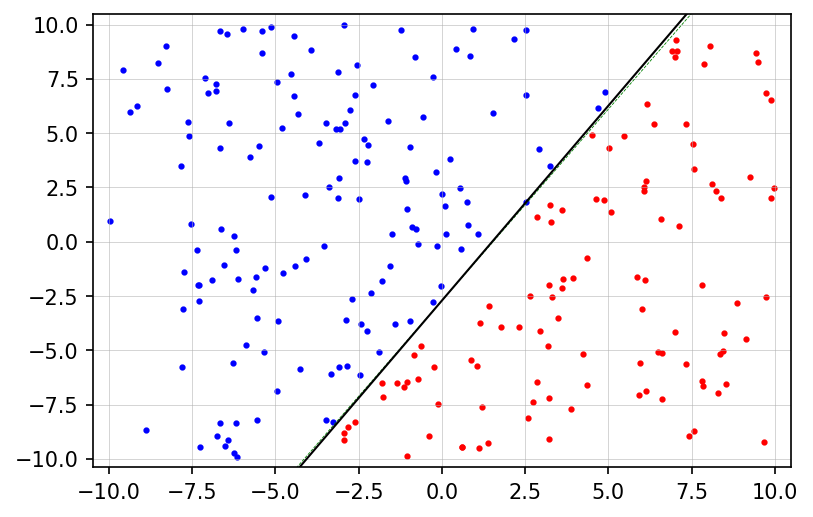

All points classified correctly after 18 iterations


In [53]:
P = Perceptron(learning_rate=lr, n_iter=n_iter)

print(f'\nSTARTING CONFIGURATION')
print_plot(X, y, w_, b_, w_, b_, conf=True)
print_w_b(w_, b_)

sleep(5)

# Fit 
loss = P.fit(X, y, w_, b_)

### Loss 

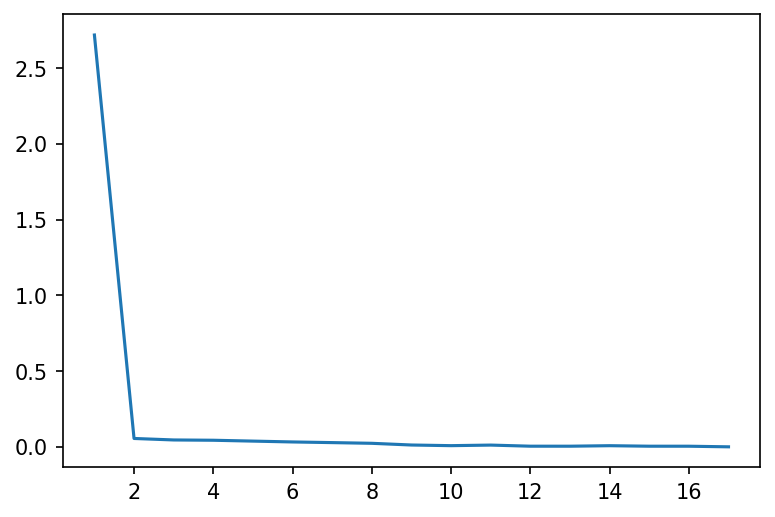

In [54]:
plt.plot([x+1 for x in range(len(loss))], loss)
plt.show()